In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import time

In [2]:
df = pd.read_csv('data_1024.csv', delim_whitespace=True, index_col=0)

In [3]:
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


In [4]:
X = df.values

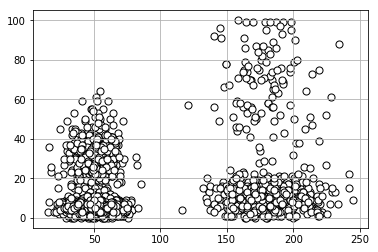

In [5]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

## 1. Agrupando os motoristas pela similaridade das features usando o algoritmo k-means++

In [6]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

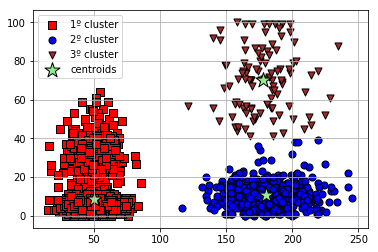

In [7]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='red',
            marker='s', edgecolor='black',
            label='1º cluster')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='blue',
            marker='o', edgecolor='black',
            label='2º cluster')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='brown',
            marker='v', edgecolor='black',
            label='3º cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='lightgreen', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 2. Utilizando o método do cotovelo (Elbow Method) e a análise de silhueta (Silhouette Analysis) para identificar o melhor valor de k

### Elbow Method

In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 992634.06


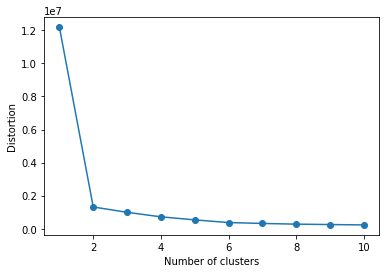

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- Pode-se observar que o melhor k seria o 2.

### Silhouette Analysis
- Na análise de silhueta, para o melhor valor encontrado para k, mostre: k-1, k e k+1.

k - 1 = 1 
- Não precisa pois com apenas 1 cluster seria o conjunto completo de dados.

k = 2

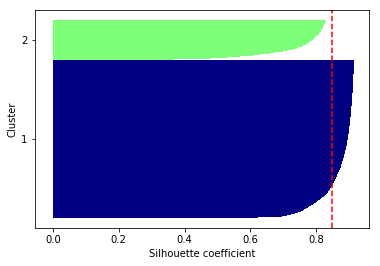

In [10]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

k + 1 = 3

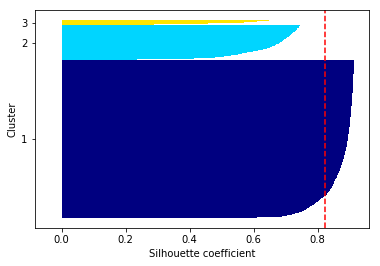

In [11]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## 3. Para o mesmo valor de k obtido acima, execute o k-means original com inicialização totalmente randômica.
- Compare os resultados de k-means e k-means++ (1) graficamente, (2) tempo de execução e (3) número mínimo de iterações necessárias para chegar ao melhor resultado.

#### (1) Graficamente

- k-means original com inicialização randômica.

In [12]:
inicio_km_random = time.time()
km_random = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km_random.fit_predict(X)
fim_km_random = time.time()

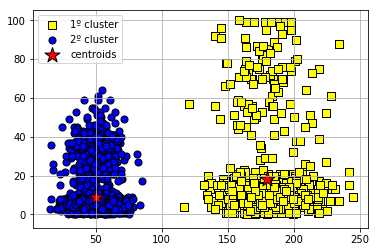

In [13]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='yellow',
            marker='s', edgecolor='black',
            label='1º cluster')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='blue',
            marker='o', edgecolor='black',
            label='2º cluster')
plt.scatter(km_random.cluster_centers_[:, 0],
            km_random.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

- k-means original com inicialização k-means++

In [14]:
inicio_km_means = time.time()
km_means = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km_means.fit_predict(X)
fim_km_means = time.time()

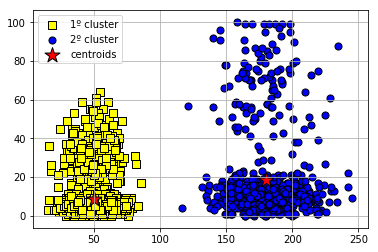

In [15]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='yellow',
            marker='s', edgecolor='black',
            label='1º cluster')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='blue',
            marker='o', edgecolor='black',
            label='2º cluster')
plt.scatter(km_means.cluster_centers_[:, 0],
            km_means.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### (2) tempo de execução

In [16]:
print("Tempo com random: ", (fim_km_random - inicio_km_random))

Tempo com random:  0.06724882125854492


In [17]:
print("Tempo com k-means++: ", (fim_km_means - inicio_km_means))

Tempo com k-means++:  0.12385129928588867


#### (3) número mínimo de iterações

In [18]:
print("Numero minimo de iterações para o k-means++: ", km_means.n_iter_)

Numero minimo de iterações para o k-means++:  1


In [19]:
print("Numero minimo de iterações para o random: ", km_random.n_iter_)

Numero minimo de iterações para o random:  3
